In [2]:
from typing import Tuple
import numpy as np
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
from lab1.Lab1_FK_answers import *
import scripts as s
import importlib

importlib.reload(s)

<module 'scripts' from 'C:\\Users\\Alfred\\Documents\\games105\\lab1\\drafts\\scripts.py'>

In [3]:
bvh = "..\\data\\simple.bvh"

joint_name, joint_parent, joint_offset = part1_calculate_T_pose(bvh)
motion_data = load_motion_data(bvh)
joint_positions, joint_orientations = part2_forward_kinematics(joint_name, joint_parent, joint_offset, motion_data, 0)

target = np.array([1., 1., 1.])

path = [0, 1, 2]
# joint_name, joint_parent, joint_offset, motion_data, joint_positions, joint_orientations

In [4]:
current_joint_offsets = joint_positions - joint_positions[joint_parent]
current_joint_offsets[0].fill(0.)
current_joint_offsets 

array([[0., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

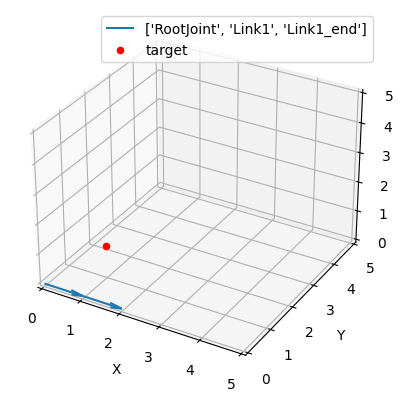

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.quiver(joint_positions[joint_parent][path, 0], 
          joint_positions[joint_parent][path, 1], 
          joint_positions[joint_parent][path, 2], 
          current_joint_offsets[path, 0], 
          current_joint_offsets[path, 1], 
          current_joint_offsets[path, 2], label=joint_name)

ax.scatter(target[0], target[1], target[2], c='r', marker='o', label='target')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim(0, 5)  # Set X-axis limits
ax.set_ylim(0, 5)  # Set Y-axis limits
ax.set_zlim(0, 5)  # Set Z-axis limits

ax.legend()

In [7]:
I = np.eye(3)
jacobian_transpose = np.cross(I, current_joint_offsets[path[1:], None, :]).reshape(-1, 3)
jacobian_transpose

array([[ 0.,  0.,  0.],
       [ 0.,  0., -1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0., -1.],
       [ 0.,  1.,  0.]])

In [8]:
error = joint_positions[path[-1]] - target
error

array([ 1., -1., -1.])

In [9]:
loss_gradient = jacobian_transpose @ error
loss_gradient

array([ 0.,  1., -1.,  0.,  1., -1.])

In [10]:
learning_rate = 0.1
update = - learning_rate * loss_gradient
update

array([-0. , -0.1,  0.1, -0. , -0.1,  0.1])

In [11]:
update.reshape(-1, 3)

array([[-0. , -0.1,  0.1],
       [-0. , -0.1,  0.1]])

In [12]:
rotations = R.from_euler("XYZ", update.reshape(-1, 3))
rotations.as_matrix()

array([[[ 0.99003329, -0.09933467, -0.09983342],
        [ 0.09983342,  0.99500417,  0.        ],
        [ 0.09933467, -0.00996671,  0.99500417]],

       [[ 0.99003329, -0.09933467, -0.09983342],
        [ 0.09983342,  0.99500417,  0.        ],
        [ 0.09933467, -0.00996671,  0.99500417]]])

In [13]:
joint_orientations

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [14]:
joint_orientations[path[:-1]]

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [16]:
result_orientations = R.from_quat(joint_orientations)
result_orientations[path[:-1]] = rotations * result_orientations[path[:-1]] 
result_orientations.as_quat(), joint_orientations

(array([[-0.00249792, -0.04991671,  0.04991671,  0.99750208],
        [-0.00249792, -0.04991671,  0.04991671,  0.99750208],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]]))